In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

la frequenza di taglio attesa è 11502.227604192227 Hz


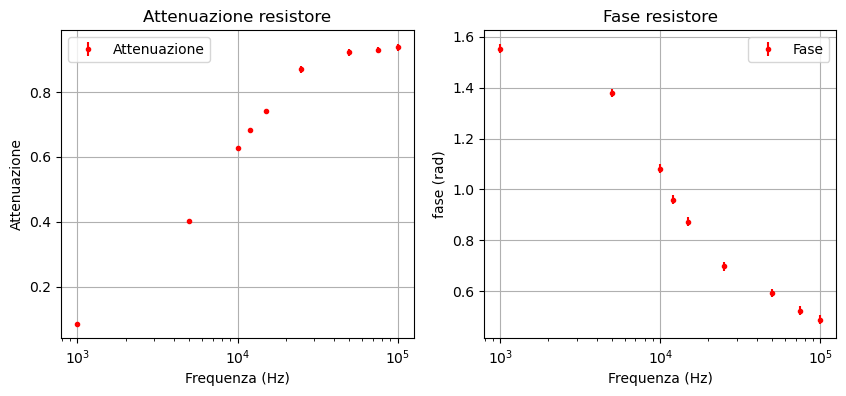

In [81]:
#resistenza, capacità e frequenza di taglio attesa
R =
C = 
Fexp = 1/(R*C*2*np.pi)
print("la frequenza di taglio attesa è {} Hz".format(Fexp))

#frequenze
F = np.array([])

#V in entrata
errVin = np.array([])
Vinp = np.array([])
l = len(Vinp)
Vin = np.full(len(Vinp), Vinp.mean())

#V in uscita
errVout = np.array([])
Vout = np.array([])

#Attenuazione
A = Vout/Vin
errA = A*np.sqrt((errVin/Vin)**2+(errVout/Vout)**2)

#Fase
phigrad = np.array([])
errphigrad = np.array([1 for i in range(len(phigrad))])
phi = (phigrad/180)*np.pi
errphi = (errphigrad/180)*np.pi

#Grafico
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#Grafico: attenuazione
axes[0].errorbar(F, A, yerr = errA, label='Attenuazione', fmt = 'o', markersize = 3, color='red')
axes[0].set_title('Attenuazione resistore')
axes[0].set_xlabel('Frequenza (Hz)')
axes[0].set_ylabel('Attenuazione')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)

#Grafico: fase
axes[1].errorbar(F, phi, yerr = errphi, label='Fase', fmt = 'o', markersize = 3, color='red')
axes[1].set_title('Fase resistore')
axes[1].set_xlabel('Frequenza (Hz)')
axes[1].set_ylabel('fase (rad)')
axes[1].legend()
axes[1].set_xscale('log')
axes[1].grid(True)


In [82]:
#fit attenuazione
def Ar(F, F0):
    return (F / F0) / np.sqrt(1 + (F / F0)**2)
least_squares = LeastSquares(F, A, errA, Ar)
m = Minuit(least_squares, F0 = Fexp)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 186.5 (χ²/ndof = 23.3)     │              Nfcn = 20               │
│ EDM = 3.5e-08 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  11.99e3  │  0.07e3   │  -0.07e3   │   0.07e3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │    -70    │    70     │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬─────────┐
│    │      F0 │
├────┼─────────┤
│ F0 │ 5.4e+03 │
└────┴─────────┘

In [86]:
def phir(F, F0):
    return np.arctan(F0/F)
least_squares1 = LeastSquares(F, phi, errphi, phir)
m1 = Minuit(least_squares1, F0 = Fexp)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 611.4 (χ²/ndof = 76.4)     │              Nfcn = 29               │
│ EDM = 8.58e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  23.8e3   │   0.4e3   │   -0.4e3   │   0.5e3    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.4e3   │   0.5e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       F0 │
├────┼──────────┤
│ F0 │ 2.02e+05 │
└────┴──────────┘

Text(0, 0.5, 'Fase (Rad)')

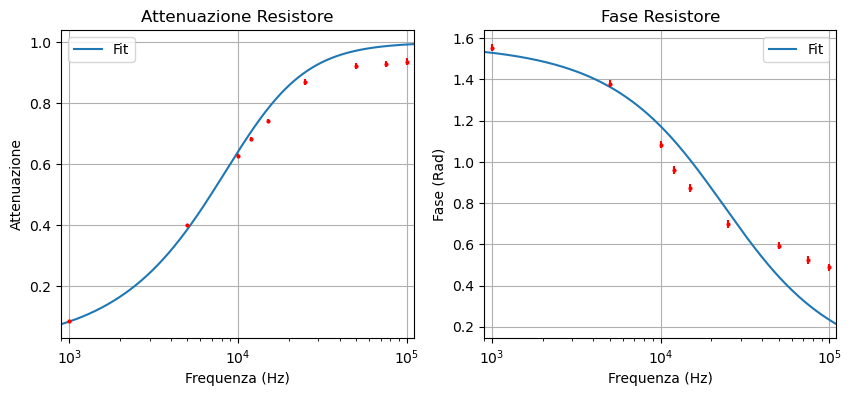

In [107]:
figg, axess = plt.subplots(1, 2, figsize=(10, 4))
F0a, F0p = m.values[0], m1.values[0]
errF0a, errF0p = m.errors[0], m1.errors[0]
x = np.linspace(min(F)*0.9,max(F)*1.1,max(F)-min(F))
#attenuazione
axess[0].plot(x,Ar(x,F0a), label = 'Fit')
axess[0].set_title('Attenuazione Resistore')
axess[0].legend()
axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'o', color ='red', markersize = 2)
axess[0].set_xlim(min(F)*0.9,max(F)*1.1)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("Attenuazione")
#fase
axess[1].plot(x,phir(x,F0p), label = 'Fit')
axess[1].set_title('Fase Resistore')
axess[1].legend()
axess[1].set_xscale('log')
axess[1].grid(True)
axess[1].errorbar(F, phi, yerr=errphi, fmt = 'o', color = 'red', markersize = 2)
axess[1].set_xlim(min(F)*0.9,max(F)*1.1)
axess[1].set_xlabel("Frequenza (Hz)")
axess[1].set_ylabel("Fase (Rad)")

In [ ]:
#Risultati
print("F0 fase resistore {} +/- {}".format(F0p,errF0p))
print("F0 attenuazione resistore {} +/- {}".format(F0a,errF0a))
#consistenza
test1 = abs((F0a - F0p)/(errF0a-errF0p))
print("F0a e F0p consistenti entro {} sigma".format(test1))
test2 = abs((F0a - F0exp)/errF0a)
print("F0a e F0exp consistenti entro {} sigma".format(test2))
test3 = abs((F0p - F0exp)/errF0p)
print("F0p e F0exp consistenti entro {} sigma".format(test3))